<b>Stratified Sampling</b>
To ensure that important characteristics of the population are well represented in both the training and test sets, we use <b>stratified sampling</b>.

### <b>What is a Strata?</b>
A <b>strata</b> is a subgroup of the data defined by a specific attribute. Stratified sampling ensures that each of these subgroups is proportionally represented.

For example, in the California housing dataset, median income is a strong predictor of house prices. Instead of randomly sampling, we can create strata based on income levels (e.g., binning median income into categories) and ensure the test set maintains the same distribution of income levels as the full dataset.

#### <b>Creating Income Categories</b>

In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv("housing.csv")

In [25]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

Text(0, 0.5, 'Number of Instances')

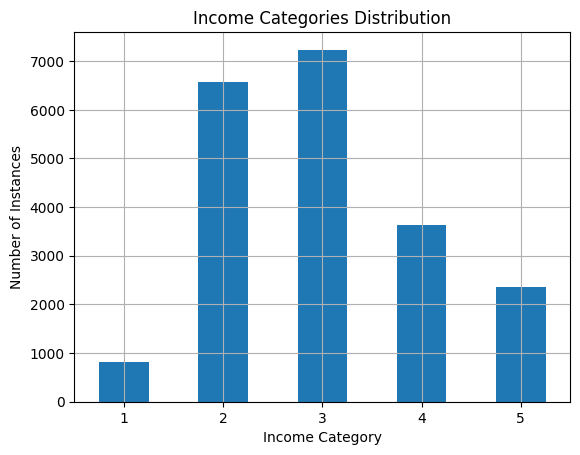

In [26]:
import matplotlib.pyplot as plt
df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.title("Income Categories Distribution")
plt.xlabel("Income Category")
plt.ylabel("Number of Instances") 

In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


This code creates a new column `Total_Price` that categorizes the `price` into five bins. Each bin represents a range of income levels, allowing us to stratify our sampling based on these categories.

We can plot these income categories to visualize the distribution:

### <b>Stratified Shuffle Split in Scikit-Learn</b>
Scikit-learn provides a built-in way to perform stratified sampling using `StratifiedShuffleSplit`.

Here’s how you can use it:

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [30]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


Text(0, 0.5, 'Number of Instances')

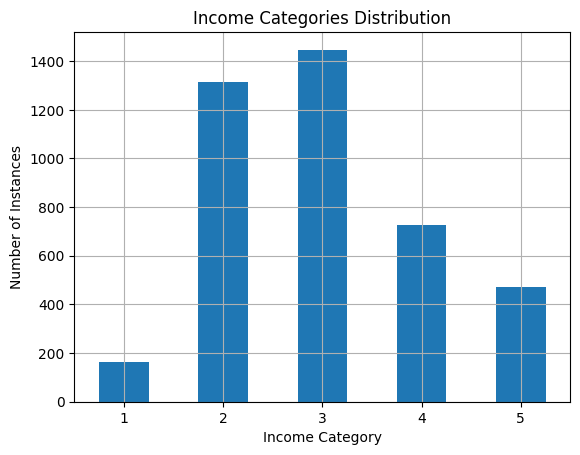

In [31]:
import matplotlib.pyplot as plt
strat_test_set["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.title("Income Categories Distribution")
plt.xlabel("Income Category")
plt.ylabel("Number of Instances") 

This ensures that the income distribution in both sets is similar to that of the full dataset, reducing sampling bias and making your model evaluation more reliable.